In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import basic_keras as b

Using TensorFlow backend.


# Load Up Trained Model

In [3]:
m = b.TSModel(b.lstm_timesteps)

In [4]:
m.m.load_weights('keras_lstm2.h5')

# Test Some Predictions

In [5]:
from singen import SinGen

In [6]:
g = SinGen(timesteps=b.lstm_timesteps)

In [7]:
x, y = g.batch()

In [8]:
y_ = m.m.predict(x, batch_size=1)

In [9]:
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

In [10]:
plt.style.use('ggplot')

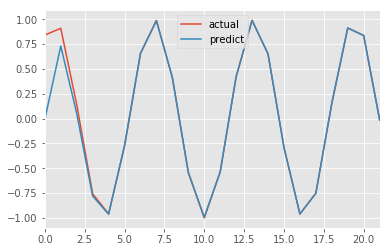

In [11]:
res.plot()

In [12]:
x, y = g.batch()
y_ = m.m.predict(x, batch_size=1)
res = pd.DataFrame({"predict": y_.squeeze(), "actual": y.squeeze()})

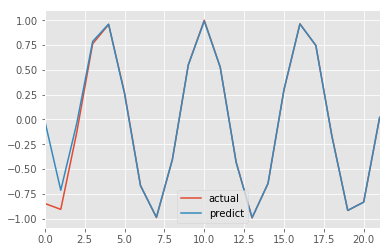

In [13]:
res.plot()

In [14]:
m.m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 22, 64)            16896     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 22, 1)             65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


# See How Far It Can Run

In [15]:
figsize=(20, 5)

In [26]:
x, y = g.batch()

In [27]:
def gen_future(count):
    xs = []
    ys = []
    for _ in range(count):
        tx, ty = g.batch()
        xs += [i for i in tx.squeeze()]
        ys += [i for i in ty.squeeze()]
    return xs, ys

In [28]:
def pred_future(xs, count):
    timesteps = xs.shape[1]
    ys = []
    # Each time through this predict loop we get one future element
    for _ in range(count * timesteps):
        xs = m.m.predict(xs, batch_size=1)
        ys += [[i for i in xs.squeeze()][-1]]  # The last one is the only thing new
    return ys

In [29]:
fx, fy = gen_future(2)

In [30]:
pfy = pred_future(x, 2)

## Here is what this looks like:

###  Note that the blue values are all generated from the LSTM - none of these are coming from the generator

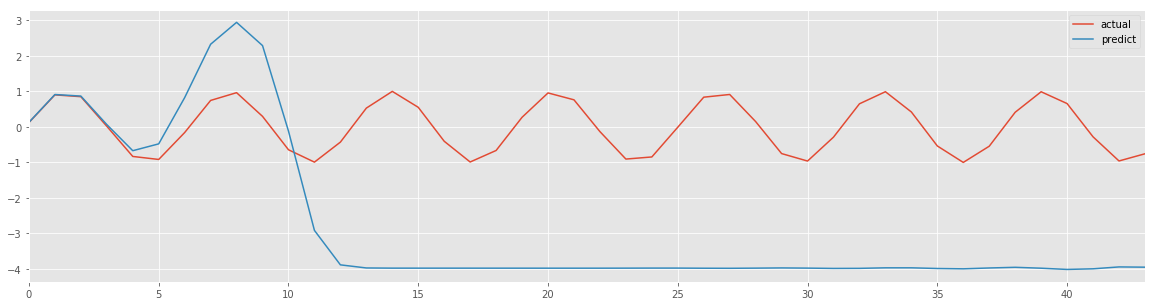

In [31]:
pd.DataFrame({'predict': pfy, 'actual': fx}).plot(figsize=figsize)

In [32]:
showpoints=10

In [33]:
pd.DataFrame({'predict y':pfy[:showpoints], 'gen x':fx[:showpoints]})

,gen x,predict y
0,0.123603,0.129338
1,0.901801,0.911724
2,0.850888,0.867926
3,0.017672,0.065942
4,-0.831791,-0.670275
5,-0.916509,-0.477399
6,-0.158593,0.824931
7,0.745133,2.327091
8,0.963787,2.943413
9,0.296340,2.289146
